# UAS Data Science – Demand & Customer Behavior Analysis

- Inayah - 1227500
- Muhammad Aditya Hafizh Zahran - 122705081

## Import Packages/Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

## Data Wrangling

### Gathering Data

In [2]:
import os
import pandas as pd

day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print("✅ Loaded:")
print(f"- day_df : shape={day_df.shape}")
print(f"- hour_df: shape={hour_df.shape}")

display(day_df.head(3))
display(hour_df.head(3))


✅ Loaded:
- day_df : shape=(731, 16)
- hour_df: shape=(17379, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Insight:**
- Pada data tersebut terdapat columns yang berkaitan dengan musim
- Terdapat columns keterangan waktu yang menjadi informasi penting

### Assessing Data

In [4]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari table yang ditampilkan ada beberapa columns yang tidak akan digunakan 
- Kita akan mengubah tipe data dteday dan memfokuskan data pada season dan weatherist, dan mengubah tipe data dari season dan weatherist menjadi kategorikal


### Cleaning Data

#### Convert Tipe Data `dteday` Menjadi `datetime`

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Sort Data Berdasarkan Tanggal

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Cek Missing Value pada Data

In [5]:
print("Missing values (day_df):")
print(day_df.isna().sum().sort_values(ascending=False))

print("Missing values (hour_df):")
print(hour_df.isna().sum().sort_values(ascending=False))


🔹 Missing values (day_df):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

🔹 Missing values (hour_df):
instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64


#### Cek Duplikasi Data

In [18]:
print("\n Jumlah Duplikasi Data:")
print(f"- day_df  : {day_df.duplicated().sum()} rows")
print(f"- hour_df : {hour_df.duplicated().sum()} rows")


 Jumlah Duplikasi Data:
- day_df  : 0 rows
- hour_df : 0 rows


#### Drop Columns

In [23]:
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

#### Melakukan Feature Engineering

In [24]:
day_df['weekday'] = day_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

hour_df['is_weekend'] = hour_df['dteday'].dt.weekday >= 5
day_df['is_weekend'] = day_df['dteday'].dt.weekday >= 5

#### Membuat Hour-Block untuk Mengelompokkan Waktu

In [41]:
def hour_block(h):
    if 6 <= h <= 11:
        return "Morning (06-11)"
    elif 12 <= h <= 17:
        return "Afternoon (12-17)"
    elif 18 <= h <= 21:
        return "Evening (18-21)"
    else:
        return "Night (22-05)"

hour_df['hour_block'] = hour_df['hr'].apply(hour_block)

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   weathersit  731 non-null    category      
 3   cnt         731 non-null    int64         
 4   weekday     731 non-null    object        
 5   is_weekend  731 non-null    bool          
 6   week        731 non-null    UInt32        
 7   month       731 non-null    int32         
 8   year        731 non-null    int32         
dtypes: UInt32(1), bool(1), category(2), datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 29.0+ KB


In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   hr          17379 non-null  int64         
 3   weathersit  17379 non-null  category      
 4   cnt         17379 non-null  int64         
 5   weekday     17379 non-null  object        
 6   is_weekend  17379 non-null  bool          
 7   hour_block  17379 non-null  object        
dtypes: bool(1), category(2), datetime64[ns](1), int64(2), object(2)
memory usage: 730.3+ KB


**Insight:**
- Melakukan perubahan pada tipe data `dteday` menjadi `datetime`
- Melakukan feature engineering dengan menambahkan kolom `weekday` `is_weekend`, `hour_block` dan urutan jam 0-23
- Setelah proses cleaning selesai dan bisa dilanjutkan ke tahap EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
correlation_matrix = day_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000    0.019211  0.406100
weathersit  0.019211    1.000000 -0.297391
cnt         0.406100   -0.297391  1.000000


In [45]:
day_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\4072242639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


cnt                            
         min   max         mean      sum
season                                  
1        431  7836  2604.132597   471348
2        795  8362  4992.331522   918589
3       1115  8714  5644.303191  1061129
4         22  8555  4728.162921   841613

In [46]:
day_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\627032202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt                            
            min   max         mean      sum
weathersit                                 
1           431  8714  4876.786177  2257952
2           605  8362  4035.862348   996858
3            22  4639  1803.285714    37869

In [47]:
correlation_matrix = hour_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000   -0.014524  0.178056
weathersit -0.014524    1.000000 -0.142426
cnt         0.178056   -0.142426  1.000000


In [48]:
hour_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\1485653920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='season').agg({


cnt                          
       min  max        mean      sum
season                              
1        1  801  111.114569   471348
2        1  957  208.344069   918589
3        1  977  236.016237  1061129
4        1  967  198.868856   841613

In [49]:
hour_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\3767775119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weathersit').agg({


cnt                          
           min  max        mean      sum
weathersit                              
1            1  977  204.869272  2338173
2            1  957  175.165493   795952
3            1  891  111.579281   158331
4           23  164   74.333333      223

In [50]:
day_df.head()

,dteday,season,weathersit,cnt,weekday,is_weekend,week,month,year
0,2011-01-01,1,2,985,Saturday,True,52,1,2011
1,2011-01-02,1,2,801,Sunday,True,52,1,2011
2,2011-01-03,1,1,1349,Monday,False,1,1,2011
3,2011-01-04,1,1,1562,Tuesday,False,1,1,2011
4,2011-01-05,1,1,1600,Wednesday,False,1,1,2011


In [51]:
hour_df.head()

,dteday,season,hr,weathersit,cnt,weekday,is_weekend,hour_block
0,2011-01-01,1,0,1,16,Saturday,True,Night (22-05)
1,2011-01-01,1,1,1,40,Saturday,True,Night (22-05)
2,2011-01-01,1,2,1,32,Saturday,True,Night (22-05)
3,2011-01-01,1,3,1,13,Saturday,True,Night (22-05)
4,2011-01-01,1,4,1,1,Saturday,True,Night (22-05)


**Insight:**
- Terdapat korelasi antara `season` & `watherist` terhadap `cnt` 
- Diketahui bahwa jumlah penyewaan sepeda dipengaruhi season dan watherist

## Visualization & Explanatory Analysis

#### EDA : Tren Harian, Mingguan, Bulan

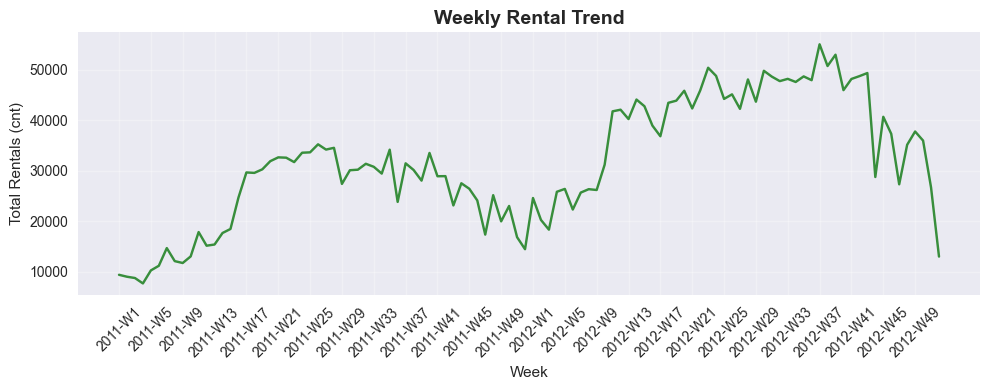

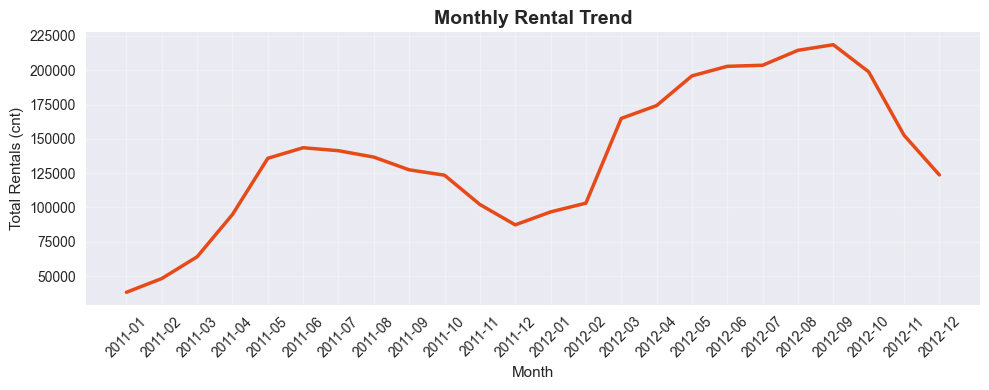

In [58]:
# Tren Weekly
weekly = day_df.groupby(['year','week'])['cnt'].sum().reset_index()
weekly['period'] = weekly['year'].astype(str) + "-W" + weekly['week'].astype(str)

plt.figure(figsize=(10,4))
sns.lineplot(data=weekly, x='period', y='cnt', color='#388E3C')
plt.title("Weekly Rental Trend", fontsize=14, weight='bold')
plt.xticks(weekly['period'][::4], rotation=45)  # tampilkan tiap 4 minggu agar rapi
plt.xlabel("Week")
plt.ylabel("Total Rentals (cnt)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tren Monthly
monthly = day_df.groupby(['year','month'])['cnt'].sum().reset_index()
monthly['period'] = monthly['year'].astype(str) + "-" + monthly['month'].astype(str).str.zfill(2)

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='period', y='cnt', color='#E64A19', linewidth=2.5)
plt.title("Monthly Rental Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Rentals (cnt)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\1898697349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = day_df.groupby('season')['cnt'].sum().reset_index()


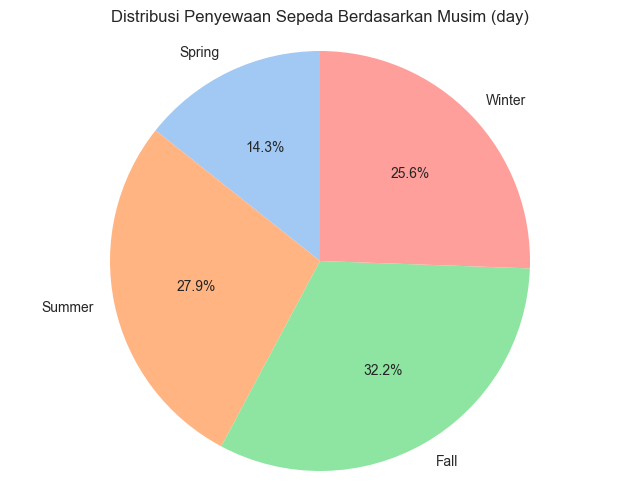

In [67]:
summary_df = day_df.groupby('season')['cnt'].sum().reset_index()
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\1584821720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = hour_df.groupby('season')['cnt'].sum().reset_index()


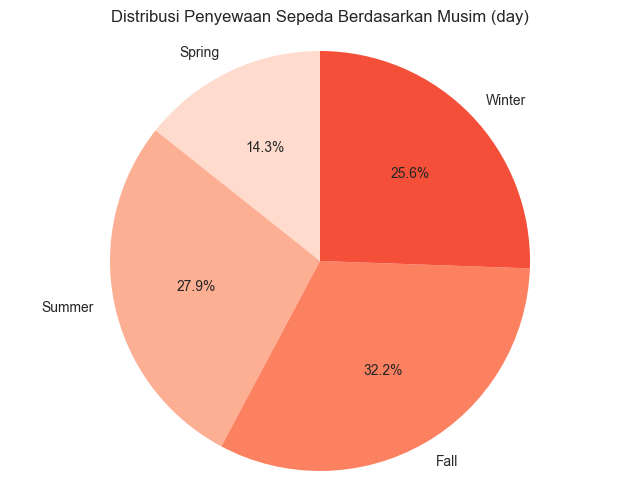

In [74]:
summary_df = hour_df.groupby('season')['cnt'].sum().reset_index()

# label
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("Reds")

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

Insight :

Weekly Trend
- Minggu-minggu tertentu terutama di tengah tahun, terlihat terjadi peningkatan signifikan, menandakan musim sibuk tahunan.

Monthly Trend
- Terlihat pola yang menunjukkan bahwa permintaan bersifat musiman dan siklikal, bukan random

- Diketahui juga bahwa penyewaan sepeda paling tinggi adalah musim Gugur dan paling rendah adalah musim Panas baik itu perhari maupun perjam

#### EDA : Tren Weekend vs Weekday

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\2562327571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weekday', y='cnt', palette='viridis', errorbar=None)


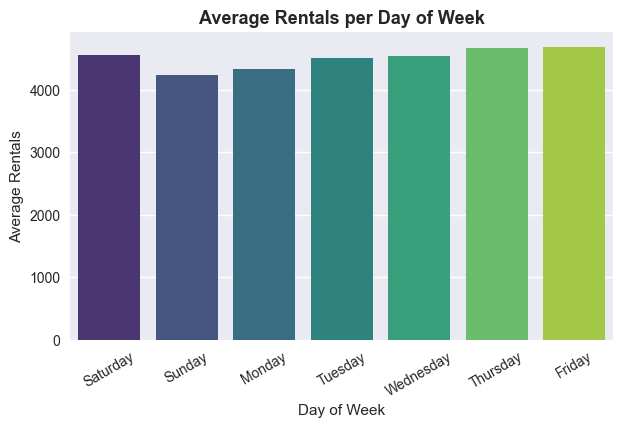

In [57]:
plt.figure(figsize=(7,4))
sns.barplot(data=day_df, x='weekday', y='cnt', palette='viridis', errorbar=None)
plt.title("Average Rentals per Day of Week", fontsize=13, weight='bold')
plt.xticks(rotation=30)
plt.ylabel("Average Rentals")
plt.xlabel("Day of Week")
plt.show()

Insight :
- Sabtu menjadi hari dengan jumlah penyewaan paling tinggi.
- Pola ini menunjukkan bahwa aktivitas sewa lebih dipengaruhi waktu luang pelanggan.

#### EDA : Tren per-Jam

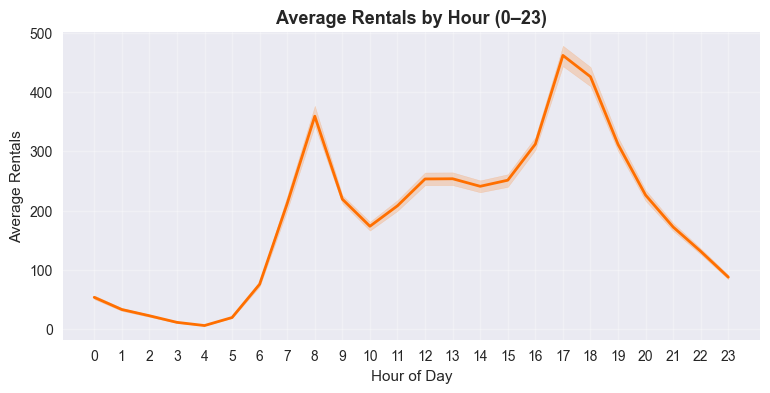

In [39]:
plt.figure(figsize=(9,4))
sns.lineplot(data=hour_df, x='hr', y='cnt', color='#FF6F00', linewidth=2)
plt.title("Average Rentals by Hour (0–23)", fontsize=13, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.show()

Insight :
- Penyewaan sepeda mulai meningkat pada pukul 06.00–08.0 dan puncaknya terjadi pukul 16.00–17.00.

#### EDA : Heatmap Hari dengan Jam

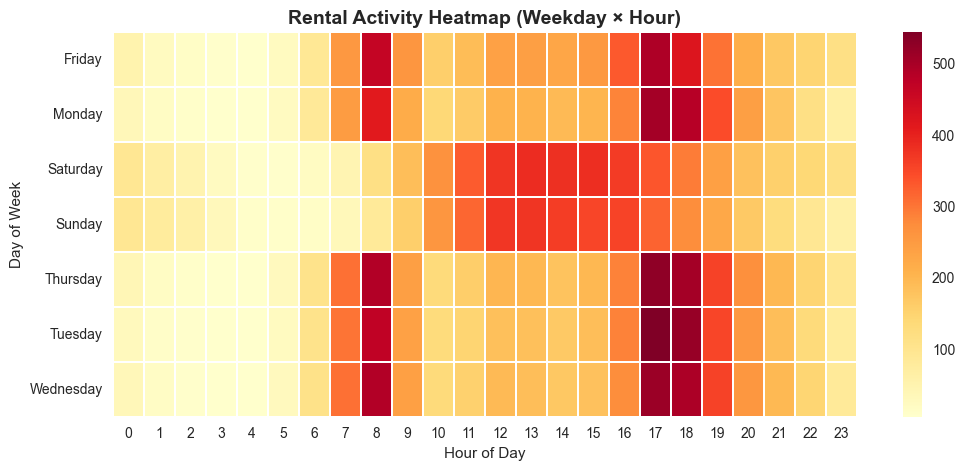

In [53]:
pivot = hour_df.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')
plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.3)
plt.title("Rental Activity Heatmap (Weekday × Hour)", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

Insight : 
- Warna panas (merah tua) dominan pada waktu sore hari di weekday dan hampir sepanjang hari di weekend.
- Weekday pattern: puncak sore (setelah jam kerja).
- Weekend pattern: demand tinggi dari pagi hingga malam.

#### Penyewaan Sedapa berdasarkan Cuaca

C:\Users\acer\AppData\Local\Temp\ipykernel_19660\3054199226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")


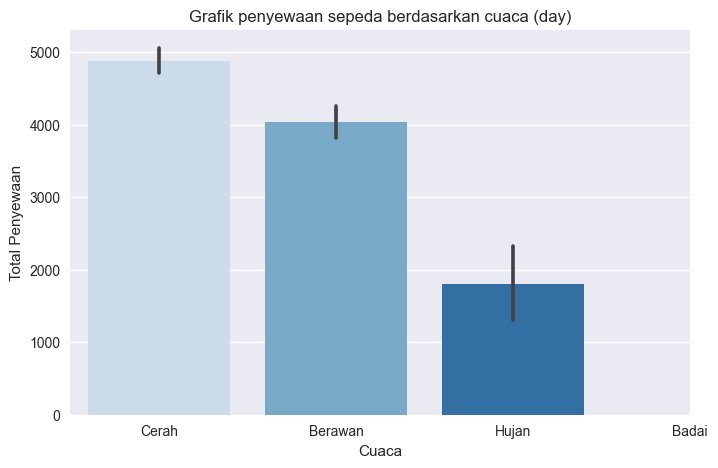

In [73]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (day)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

Insight :
- Dimana kondisi musim dengan cuaca baik (Cerah) menghasilkan rata-rata penyewaan lebih tinggi ketimbang kondisi musim tidak ideal (Mendung, Hujan)
- Diketahui bahwa hari sabtu dan minggu memiliki jumlah penyewaan yang lebih tinggi

C:\Users\jayjo\AppData\Local\Temp\ipykernel_46628\285526730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")


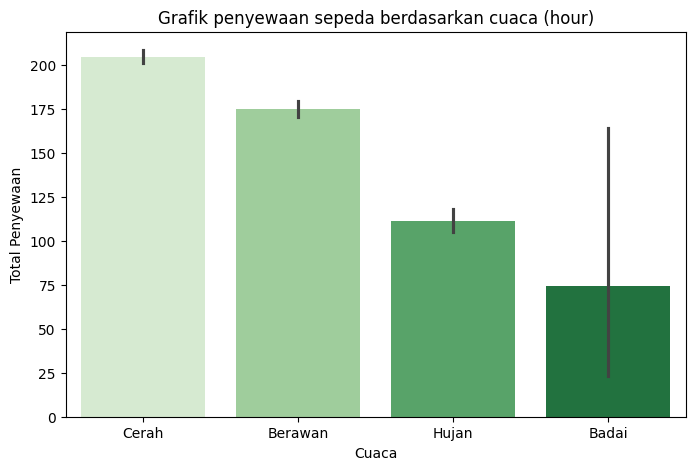

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (hour)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

Insight :
- Pada grafik ini, diketaui bahwa pada cuaca badai masih terdapat pengguna yang menyewa sepeda dengan kurun waktu perjam

## Analisis Lanjutan (Opsional)

In [69]:
#  Analisis ini bertujuan untuk mengkategorikan tren dari level deman tersebut menjadi 3 yakni Low, Medium, High 
cnt_stats = day_df['cnt'].describe()

Deman = [cnt_stats['min'], cnt_stats['25%'], cnt_stats['75%'], cnt_stats['max']]
labels = ["Low", "Medium", "High"]
day_df['Level_deman'] = pd.cut(day_df['cnt'], bins=Deman, labels=labels)

rent_distribution = day_df['Level_deman'].value_counts()
print(rent_distribution)

Level_deman
Medium    365
High      183
Low       182
Name: count, dtype: int64


In [70]:
#  analisis ini bertujuan untuk mengkategorikan tren dari level deman tersebut menjadi 3 yakni Low, Medium, High
cnt_stats = hour_df['cnt'].describe()

Deman = [cnt_stats['min'], cnt_stats['25%'], cnt_stats['75%'], cnt_stats['max']]
labels = ["Low", "Medium", "High"]
hour_df['Level_deman'] = pd.cut(hour_df['cnt'], bins=Deman, labels=labels)

rent_distribution = hour_df['Level_deman'].value_counts()
print(rent_distribution)

Level_deman
Medium    8676
High      4326
Low       4219
Name: count, dtype: int64


- dari hasil tersebut kita bisa melihat jumlah level deman dari keseluruhan jumlah penyewaan

## Conclusion

- Dari hasil analisis dapat dilihat musim cukup mempengaruhi jumlah penyewaan sepeda dengan gap data yang tidak terlalu jauh dapat dikatakan sepeda menjadi kebutuhan sehari hari tanpa terlalu taku memperhatikan musim 
- cuaca sendiri berpengaruh penting dimana dapat dilihat cuaca cerah memiliki intensitas penyewaan yang tinggi dimana dalam satu harinya bisa mencapai hampi 5000 penyewaan

## Data Merge

In [75]:
merged_df = pd.merge(day_df, hour_df, on=['dteday', 'season'], how='inner')
merged_df.to_csv("dashboard/main_data.csv", index=False)

# Menampilkan hasil join
print(merged_df)

          dteday season weathersit_x  cnt_x weekday_x  is_weekend_x  week  \
0     2011-01-01      1            2    985  Saturday          True    52   
1     2011-01-01      1            2    985  Saturday          True    52   
2     2011-01-01      1            2    985  Saturday          True    52   
3     2011-01-01      1            2    985  Saturday          True    52   
4     2011-01-01      1            2    985  Saturday          True    52   
...          ...    ...          ...    ...       ...           ...   ...   
17374 2012-12-31      1            2   2729    Monday         False     1   
17375 2012-12-31      1            2   2729    Monday         False     1   
17376 2012-12-31      1            2   2729    Monday         False     1   
17377 2012-12-31      1            2   2729    Monday         False     1   
17378 2012-12-31      1            2   2729    Monday         False     1   

       month  year Level_deman_x weather_label_x  hr weathersit_y  cnt_y  \